<a href="https://colab.research.google.com/github/akansha810/akansha810/blob/main/Hotel_booking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
## Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [43]:
## google mount
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
path="/content/drive/MyDrive/Hotel booking dataset/archive (1)/"

In [45]:
hotel= pd.read_csv(path + "hotel_booking.csv")

In [46]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [47]:
hotel.shape

(119390, 36)

Exploratory Data Analysis and Data cleaning

In [48]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [49]:
### Drop the personal details of the customer
hotel.drop(columns=['name', 'email',
       'phone-number', 'credit_card'],inplace=True)

In [50]:
## datatypes of columns
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
## Convert the object dataset in datetime
hotel["reservation_status_date"]=pd.to_datetime(hotel["reservation_status_date"])


In [52]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [53]:
### Summary statistics of Object Columns
hotel.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [54]:
## To check the categories in object_datatype_column
for col in hotel.describe(include="object").columns:
  print(col)
  print(hotel[col].unique())
  print("_"*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [55]:
## check missing values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [56]:
### Drop the columns
hotel.drop(columns=['agent', 'company'], inplace=True)
### Drop the missing values
hotel.dropna(inplace=True)

In [58]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [62]:
### Summary statistics of Numerical Columns
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


<Axes: >

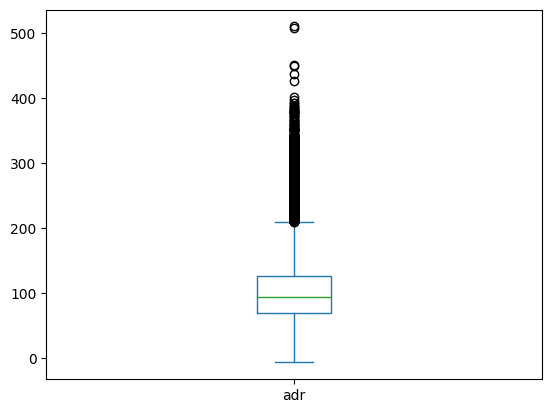

In [63]:
## Boxplot of adr column

hotel["adr"].plot(kind="box")

In [61]:
## Removing the value which are maximum then 5000 in adr column
hotel=hotel[hotel["adr"]<5000]

Data Analysis and Visualization

In [68]:
### Return the percentage value when normalize = True
cancelled_perc= hotel["is_canceled"].value_counts(normalize=True)
cancelled_perc


### 62% reservations are not canceled
### 37% reservations are canceled

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

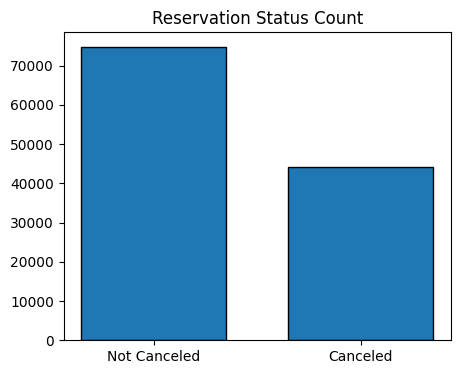

In [74]:
plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(["Not Canceled","Canceled"],hotel["is_canceled"].value_counts(),edgecolor="k",width=0.7)
plt.show()

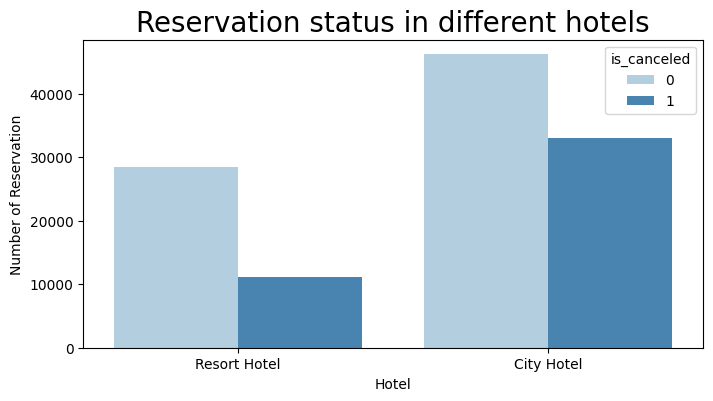

In [82]:
#### Visualize the count resort or hotel cancellation
plt.figure(figsize=(8,4))
axl= sns.countplot(x="hotel", hue="is_canceled", data=hotel, palette='Blues')
legend_labels_ = axl.get_legend_handles_labels()
#axl.legend(bbox_to_anchor(1,1))
plt.title("Reservation status in different hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of Reservation")
plt.show()

In [84]:
## Percentage of resort column
resort_hotel=hotel[hotel["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [85]:
## Percentage of resort column
city_hotel=hotel[hotel['hotel']=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [86]:
### Effect of price on city hotel and resort hotel
###adr= average daily rate
resort_hotel= resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel= resort_hotel.groupby("reservation_status_date")[["adr"]].mean()

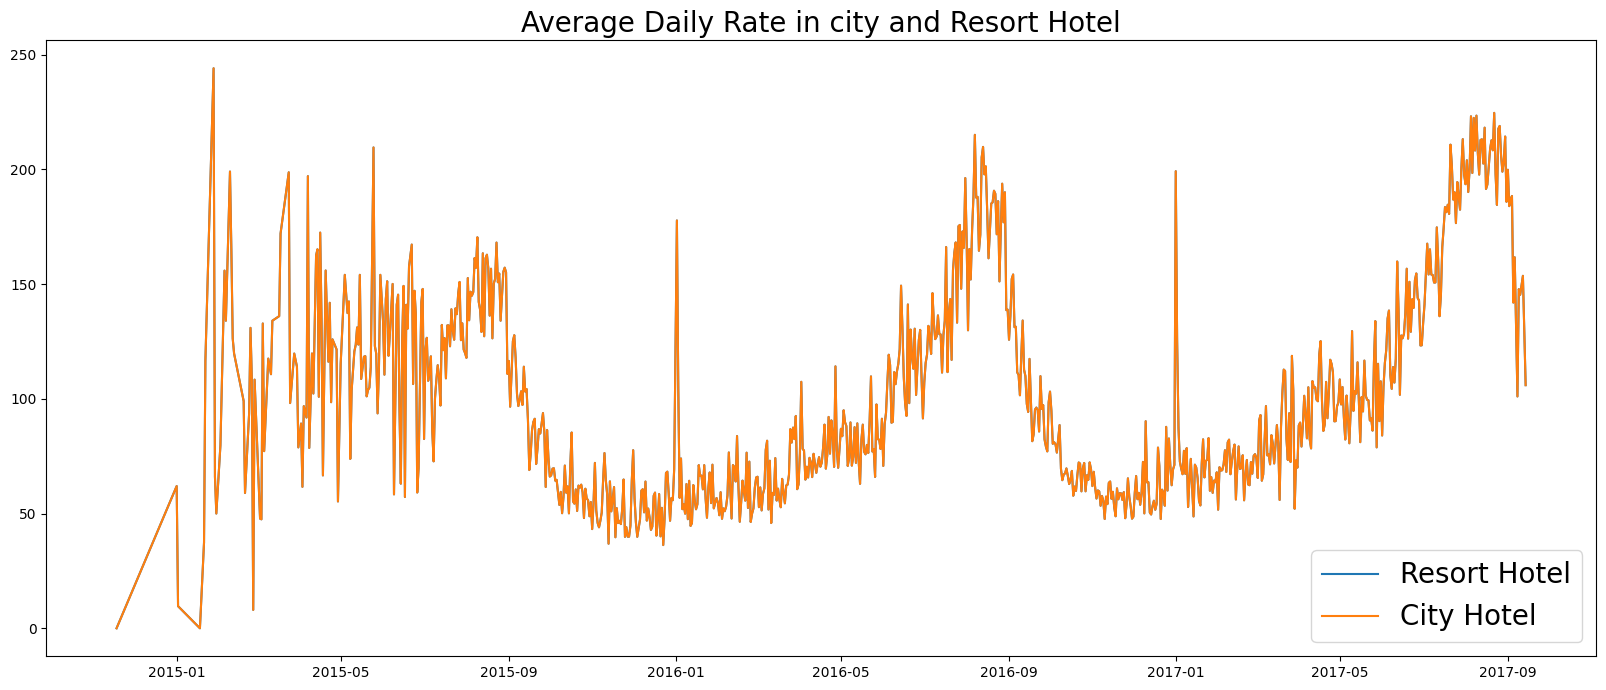

In [96]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in city and Resort Hotel", fontsize=20)
plt.plot(resort_hotel.index, resort_hotel["adr"], label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel["adr"],label="City Hotel")
plt.legend(fontsize=20)
plt.show()

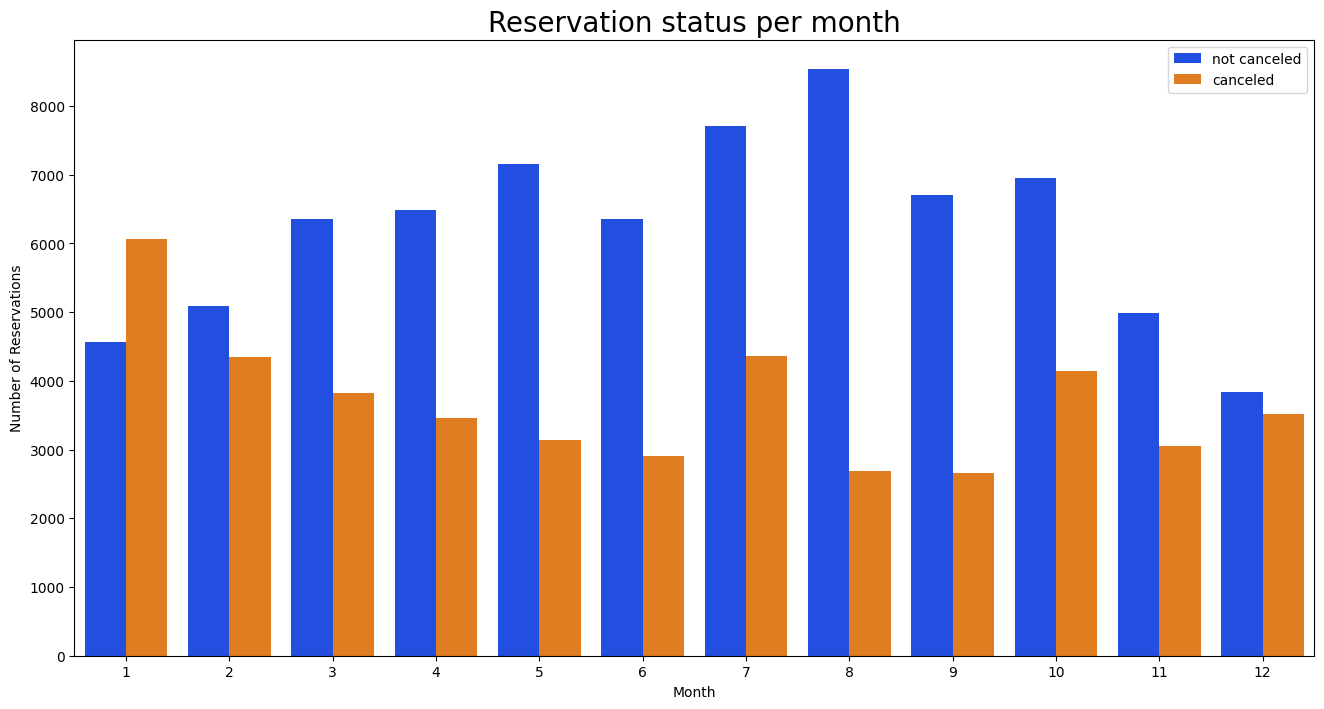

In [99]:
### Month Cancellation
hotel["month"]=hotel["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax=sns.countplot(x="month", hue="is_canceled",data=hotel, palette="bright")
legend_labels= ax.get_legend_handles_labels()
plt.title("Reservation status per month", size=20)
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.legend(["not canceled","canceled"])
plt.show()

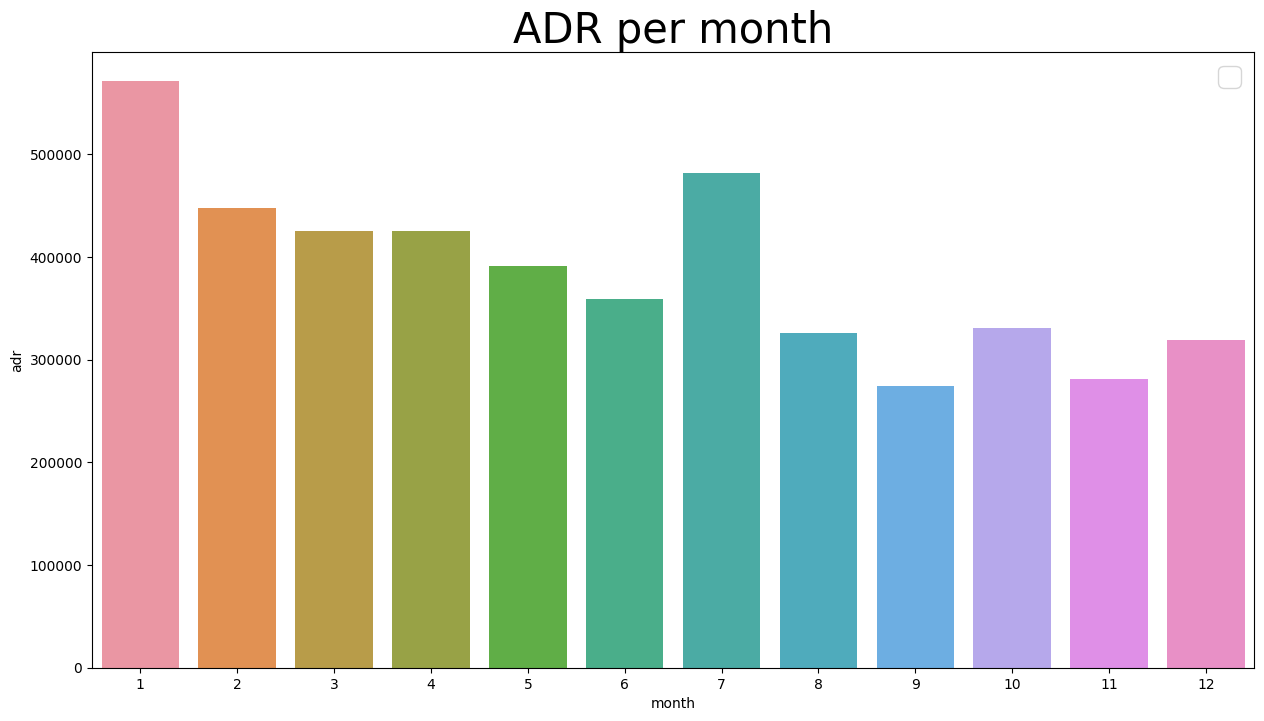

In [102]:
### Average daily rate per month
# Cancelation in months
plt.figure(figsize=(15,8))
plt.title("ADR per month", fontsize=30)
# Assuming 'hotel' is your DataFrame
canceled_hotel = hotel[hotel["is_canceled"] == 1]  # Filtering the DataFrame to include only canceled bookings
# Grouping the filtered DataFrame by the "month" column and calculating the sum of the "adr" column for each group
sum_adr_by_month = canceled_hotel.groupby("month")[['adr']].sum().reset_index()
# Creating a bar plot using Seaborn
sns.barplot(x="month", y="adr", data=sum_adr_by_month)
#sns.barplot("month", "adr", data=hotel[hotel["is_canceled"]==1].groupby("month")[['adr']].sum().reset_index())
plt.show()

In [106]:
## top 10 countries
canceled_data=hotel[hotel["is_canceled"]==1]
top_10_country= canceled_data["country"].value_counts()[:10]
top_10_country

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

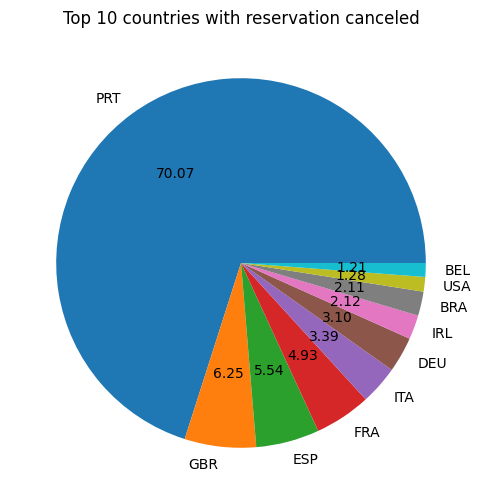

In [108]:
### Plot the pie chart
plt.figure(figsize=(8,6))
plt.title("Top 10 countries with reservation canceled")
plt.pie(top_10_country, autopct="%.2f",labels=top_10_country.index)
plt.show()

In [109]:
### traveler's country
hotel["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [110]:
# percentage count
hotel["market_segment"].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [111]:
### Canceled reservation from travelers
canceled_data["market_segment"].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [114]:
### canceled Reservation
canceled_hotel_adr=canceled_hotel.groupby("reservation_status_date")[["adr"]].mean()
canceled_hotel_adr.reset_index(inplace=True)
canceled_hotel_adr.sort_values("reservation_status_date",inplace=True)

not_canceled_data= hotel[hotel['is_canceled']==0]
not_canceled_hotel_adr=canceled_hotel.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_hotel_adr.reset_index(inplace=True)
not_canceled_hotel_adr.sort_values("reservation_status_date",inplace=True)

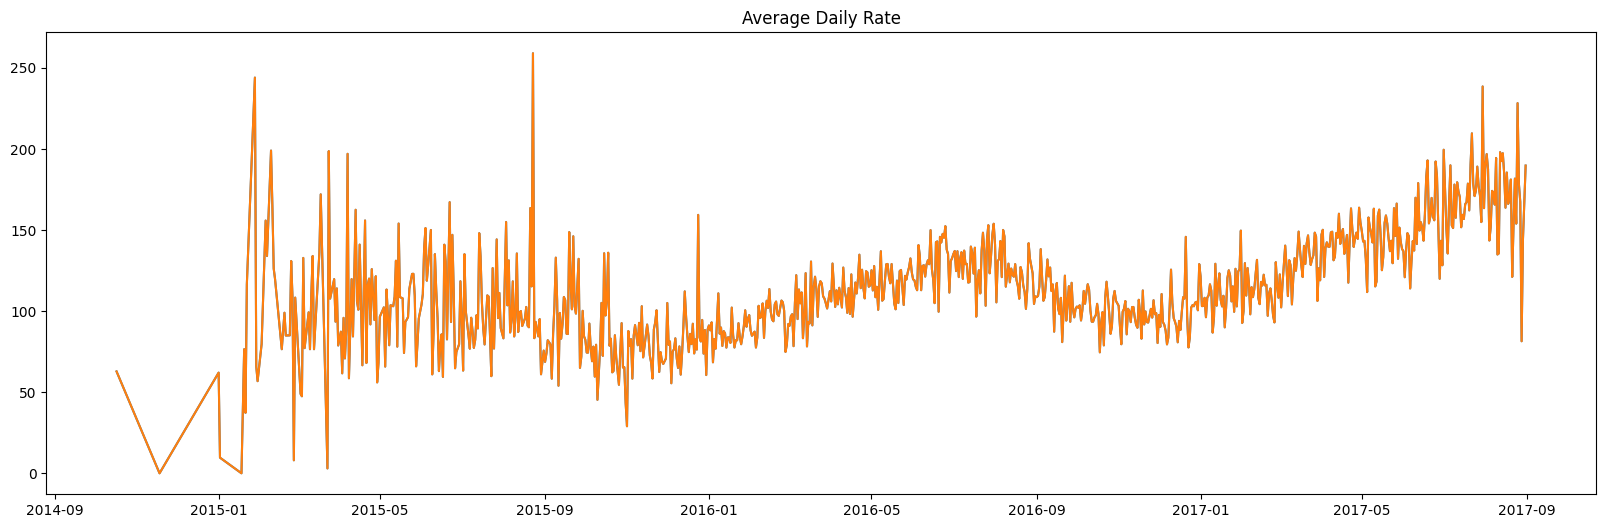

In [117]:
### plot
plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(not_canceled_hotel_adr["reservation_status_date"],not_canceled_hotel_adr["adr"],label="not canceled")
plt.plot(canceled_hotel_adr["reservation_status_date"],canceled_hotel_adr["adr"],label="canceled")
plt.show()